<a href="https://colab.research.google.com/github/mhoch123/MAT422/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.3
Authors: Megan Hoch and Bronwyn Curnow

#1.3.1 QR Regression

**QR Regression:** This is a useful procedure to solve linear least squares problems using  Gram-Schmidt to get the orthonormal basis $span(a_1,\ldots, a_m)$ from a linearly independent set of $span(a_1,\ldots, a_m)$.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

A = np.random.randint(10, size = (3, 3))
print(A, '\n')
q,r = np.linalg.qr(A)
print(np.round(q,2),np.round(r,2), '\n')
A2 = np.dot(q,r)
print(np.round(A2,2))

[[7 2 4]
 [3 9 1]
 [7 4 6]] 

[[-0.68  0.33 -0.66]
 [-0.29 -0.94 -0.18]
 [-0.68  0.07  0.73]] [[-10.34  -6.67  -7.06]
 [  0.    -7.52   0.81]
 [  0.     0.     1.59]] 

[[7. 2. 4.]
 [3. 9. 1.]
 [7. 4. 6.]]


This is the *QR Factorization* of x. As we can see, finding the q and the r matrices, and then dotting them together gives our original matrix back.

#1.3.2 Least Squares Problems

**Normal Equations:** Let $A \in \mathbb{R}^{n x m}$ be an $n x m$ matrix with linearly independent columns and let $b \in \mathbb{R}^{n}$ be a vector where the solution to the least squares problem is $min_{x \in \mathbb{R}^{m}}\parallel Ax-b \parallel$ satisfies $A^{T} Ax = A^{T}b$. This is known as a normal equation. We can also write this equation as $\hat{x}=(A^{T} A)^{-1}A^{T}b$ and the projection can be written as $p=A\hat{x}$.

**Least Squares via QR:** Let $A \in \mathbb{R}^{n x m}$ be an $n x m$ matrix with linearly independent columns and let $b \in \mathbb{R}^{n}$ be a vector, and let $A = QR$ be a QR decomposition of A, where $Q$ is a $\mathbb{R}^{n x m}$ matrix with $Q^{T}Q = I_{m x m}$ and $R$ is a upper triangular. The solution satisfies $Rx^{*} = Q^{T}b$, a least squares problem.


In [ ]:
b = np.random.randint(10, size = (3,1))
print(b, '\n')
def least(A,b):
  xhat = np.matmul(np.matmul(np.linalg.inv((np.matmul(A.transpose(),A))),A.transpose()),b)
  return xhat
print(least(A,b))


[[2]
 [5]
 [3]] 

[[ 0.14516129]
 [ 0.50806452]
 [-0.00806452]]


This code finds the value that minimizes $\hat{x}$.

In [ ]:
p = np.matmul(A, least(A,b))
print('\n', p)


 [[2.]
 [5.]
 [3.]]


As we can see by multiplying A by $\hat{x}$, we get a value back that is close to our original b value.

#1.3.3 Linear Regression

**Linear Regression:** Given input data points $(x_i,y_i)_{i=1} ^{n}$ with each $x_i = (x_{i1},\ldots,x_{id})^{T}$, The common approach is a minimization problem which can be formulated in the matrix form, which then can be transformed into the equation $min_{\beta} \parallel y-A\beta \parallel^{2}$

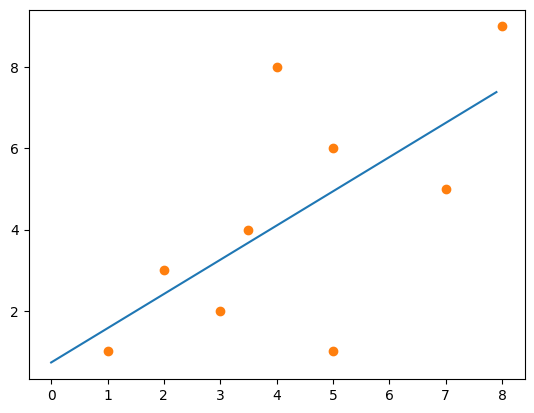

In [ ]:
A = np.array(([1,1],[1,2],[1,3],[1,3.5],[1,4],[1,5],[1,5],[1,7],[1,8]))
b1 = np.array(([1,3,2,4,8,6,1,5,9]))
b = b1.transpose()

xhat = least(A,b)
x = np.arange(0,8,.1)
y = xhat[1]*x + xhat[0]
plt.plot(x,y)
plt.plot(A[:,1], b, 'o')

Using 'random' data, we can use our *Least Squares* function to create a trend line to fit data!